In [3]:
path = "/Users/shin/Desktop/"

In [4]:
import numpy as np
import cv2

from matplotlib import pyplot as plt

img = cv2.imread(path+'222.png',cv2.IMREAD_COLOR)

# 可提取影像的ＲＧＢ顏色,如果為灰階的話顯示出來則為亮度
px=img[100,100] 
print(px)
blue=img[100,100,0] 
print(blue)
#可以更改像素值(改單點)
img[100,100]=[255,255,255]
print(img[100,100])

plt.imshow(img)
plt.xticks([]), plt.yticks([])
plt.show()

TypeError: 'NoneType' object is not subscriptable

19
[131  59  19]
100


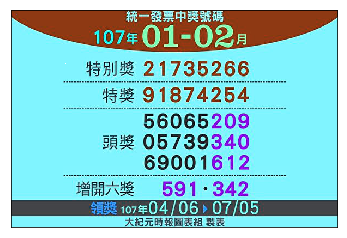

(400, 600, 3)
720000
uint8


In [4]:
#利用np.array.item的方式來體去及設定
print(img.item(10,10,2))
print(img[10,10])
img.itemset((10,10,2),100)
print(img.item(10,10,2))

plt.imshow(img)
plt.xticks([]), plt.yticks([])
plt.show()
print(img.shape)
print(img.size)
print(img.dtype)

### ROI p.39

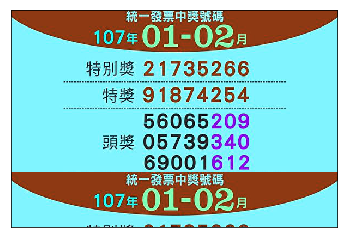

In [13]:
import numpy as np
import cv2
from matplotlib import pyplot as plt

img = cv2.imread(path+'222.jpg',cv2.IMREAD_COLOR)

#ROI位置
ORI=img[0:100,0:600]
#將ROI貼到指定位置
img[300:400,0:600]=ORI

plt.imshow(img)
plt.xticks([]), plt.yticks([])
plt.show()

#### 拆分及合併圖像通道 p.41

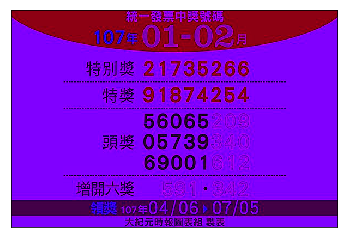

In [14]:
import numpy as np
import cv2
from matplotlib import pyplot as plt

img = cv2.imread(path+'222.jpg',cv2.IMREAD_COLOR)

img[:,:,1] = 0

plt.imshow(img)
plt.xticks([]), plt.yticks([])
plt.show()

#### 圖像擴充 P.41

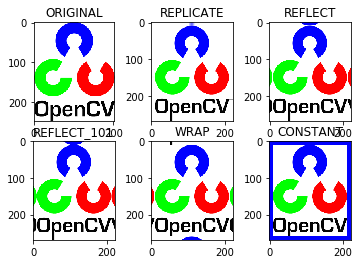

In [57]:
import cv2
import numpy as np
from matplotlib import pyplot as plt

BLUE=[0,0,255]
img1=cv2.imread(path+'opencv_logo.png')
replicate = cv2.copyMakeBorder(img1,10,10,10,10,cv2.BORDER_REPLICATE) 
reflect = cv2.copyMakeBorder(img1,10,10,10,10,cv2.BORDER_REFLECT) 
reflect101 = cv2.copyMakeBorder(img1,10,10,10,10,cv2.BORDER_REFLECT_101) 
wrap = cv2.copyMakeBorder(img1,10,10,10,10,cv2.BORDER_WRAP)
constant= cv2.copyMakeBorder(img1,10,10,10,10,cv2.BORDER_CONSTANT,value=BLUE)
plt.subplot(231),plt.imshow(img1,'gray'),plt.title('ORIGINAL')
plt.subplot(232),plt.imshow(replicate,'gray'),plt.title('REPLICATE')
plt.subplot(233),plt.imshow(reflect,'gray'),plt.title('REFLECT')
plt.subplot(234),plt.imshow(reflect101,'gray'),plt.title('REFLECT_101')
plt.subplot(235),plt.imshow(wrap,'gray'),plt.title('WRAP') 
plt.subplot(236),plt.imshow(constant,'gray'),plt.title('CONSTANT')
plt.show()

#### 圖像加法 p.43

In [58]:
import numpy as np
x = np.uint8([250])
y = np.uint8([10])
print(cv2.add(x,y))
print(x+y)

[[255]]
[4]


#### 圖像混合  p.43

(200, 200, 3)
(200, 200, 3)


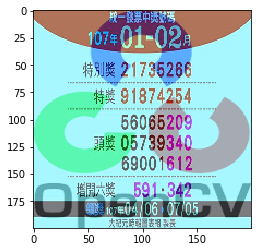

In [178]:
import cv2
import numpy as np
from matplotlib import pyplot as plt

img1 = cv2.imread(path+'222.png')
#做cv2.resize的動作
#CV_INTER_NN - 最近邻插值
#CV_INTER_LINEAR - 双线性插值
#CV_INTER_AREA - 使用象素关系重采样。当图像缩小时候，该方法可以避免波纹出现。当图像放大时，类似于 CV_INTER_NN 方法.. 
#CV_INTER_CUBIC - 立方插值. 
img1 = cv2.resize(img1,(200,200),interpolation=cv2.INTER_CUBIC)
print(img1.shape)
img2=cv2.imread(path+'opencv_logo.png')
img2=cv2.resize(img2,(200,200),interpolation=cv2.INTER_CUBIC)
print(img2.shape)
dst=cv2.addWeighted(img1,0.7,img2,0.3,0)#shape 必需要一樣才能夠相疊,最後一個參數為亮度
#cv2.imshow('dst',dst)
#cv2.waitKey(0)
#cv2.destroyAllWindow()
plt.imshow(dst)
plt.show()

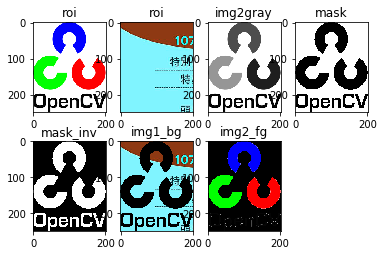

In [24]:
import cv2
import numpy as np
from matplotlib import pyplot as plt


# 加载图像
img1 = cv2.imread(path+'222.png')
img2 = cv2.imread(path+'opencv_logo.png')

rows,cols,channels = img2.shape
roi = img1[0:rows, 0:cols ]

#將img2轉灰階
img2gray = cv2.cvtColor(img2,cv2.COLOR_BGR2GRAY)

#cv2.threshold 參考 https://blog.csdn.net/on2way/article/details/46812121
#ret為閥值 , mask為解析後的圖像
ret, mask = cv2.threshold(img2gray, 175, 255, cv2.THRESH_BINARY)
#將mask0/1轉換
mask_inv = cv2.bitwise_not(mask)
# https://blog.csdn.net/jnulzl/article/details/47129887 (參考資料)
# Now black-out the area of logo in ROI
# 取 roi 中与 mask 中不为零的值对应的像素的值，其他值为 0
# 注意这里必须有 mask=mask 或者 mask=mask_inv, 其中的 mask= 不能忽略 
img1_bg = cv2.bitwise_and(roi,roi,mask = mask)
# 取 roi 中与 mask_inv 中不为零的值对应的像素的值，其他值为 0。
# Take only region of logo from logo image.
#自己跟自己疊,用mask_inv遮起來
img2_fg = cv2.bitwise_and(img2,img2,mask = mask_inv)

plt.subplot(241),plt.imshow(img2,'gray'),plt.title('roi')
plt.subplot(242),plt.imshow(roi,'gray'),plt.title('roi')
plt.subplot(243),plt.imshow(img2gray,'gray'),plt.title('img2gray')
plt.subplot(244),plt.imshow(mask,'gray'),plt.title('mask')
plt.subplot(245),plt.imshow(mask_inv,'gray'),plt.title('mask_inv')
plt.subplot(246),plt.imshow(img1_bg,'gray'),plt.title('img1_bg')
plt.subplot(247),plt.imshow(img2_fg,'gray'),plt.title('img2_fg')

plt.show()

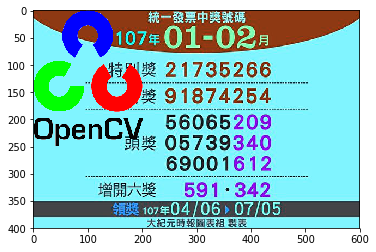

In [23]:
# Put logo in ROI and modify the main image
# 因為背景是黑色的灰階值為“0”將加過後只會留下有顏色的部分
dst = cv2.add(img1_bg,img2_fg)
img1[0:rows, 0:cols ] = dst
plt.imshow(img1)
plt.show()

#### 程序性能檢測及優化

In [49]:
# 運用getTickCount()拿到秒數
import cv2
import numpy as np

img1 = cv2.imread(path+'222.png')

e1 = cv2.getTickCount()
for i in range(5,49,2):
    img1 = cv2.medianBlur(img1,i)
e2 = cv2.getTickCount()
t = (e2 - e1)/cv2.getTickFrequency() 
print(t)

0.631498719


0.7308812141418457


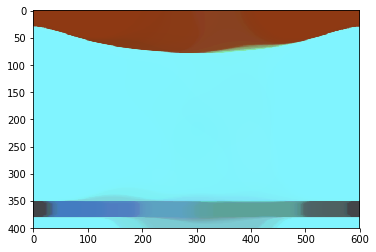

In [51]:
# 運用time.time()拿到秒數
import cv2
import numpy as np
import time
from matplotlib import pyplot as plt


a = time.time()
img1 = cv2.imread(path+'222.png')
for i in range(5,49,2):
    #中值濾波器
    img1 = cv2.medianBlur(img1,i)
b = time.time()
print(b-a)
plt.imshow(img1)
plt.show()

In [5]:
import cv2
import numpy as np

#啟動優化器加速運算 預設為開true
# check if optimization is enabled
cv2.setUseOptimized(True)
cv2.useOptimized()

True

In [6]:
%timeit res = cv2.medianBlur(img1,49)

NameError: name 'img1' is not defined

In [58]:
# Disable it
cv2.setUseOptimized(False)
cv2.useOptimized()

False

In [60]:
%timeit res = cv2.medianBlur(img1,49)

36.6 ms ± 5.71 ms per loop (mean ± std. dev. of 7 runs, 10 loops each)


In [66]:
import cv2
import numpy as np

In [67]:
x = 5

In [68]:
%timeit y=x**2

459 ns ± 18.3 ns per loop (mean ± std. dev. of 7 runs, 1000000 loops each)


In [69]:
%timeit y=x*x

92.4 ns ± 2.37 ns per loop (mean ± std. dev. of 7 runs, 10000000 loops each)


In [70]:
z = np.uint8([5])

In [71]:
%timeit y=z*z

840 ns ± 22.5 ns per loop (mean ± std. dev. of 7 runs, 1000000 loops each)


In [72]:
%timeit y=np.square(z)

767 ns ± 28.1 ns per loop (mean ± std. dev. of 7 runs, 1000000 loops each)


##### 注意 :  Python 的标量计算比 Nump 的标量计算要快。对于仅包含一两个 元素的操作 Python 标量比 Numpy 的数组要快。但是当数组稍微大一点时 Numpy 就会胜出了。

#### 比較 cv2.countNonZero() 和 np.count_nonzero()

In [85]:
import cv2
import numpy as np

gray = cv2.cvtColor(img1, cv2.COLOR_BGR2GRAY)

%timeit z = np.count_nonzero(gray)

613 µs ± 6.66 µs per loop (mean ± std. dev. of 7 runs, 1000 loops each)


In [86]:
# cv2.countNonZero()快很多 但只能用在gray
%timeit z = cv2.countNonZero(gray)

15.4 µs ± 280 ns per loop (mean ± std. dev. of 7 runs, 100000 loops each)
